# Covid-19 Data Visualisation

In [1]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys



## Utility Function

In [2]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Covid Data

In [3]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Covid_19_Countires_Wise 

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
39099,2020-08-16,West Bank and Gaza,16534,9838,110
39100,2020-08-16,Western Sahara,10,8,1
39101,2020-08-16,Yemen,1869,1013,530
39102,2020-08-16,Zambia,9343,8412,260


## Covid_19_Countires_Wise Analysis

In [4]:
## Check the List of Countries avaialable

count_avalaible(Covid_19_Countires_Wise,'Country')

#print(set(Covid_19_Countires_Wise['Country']))

Madagascar | Laos | Belarus | Guinea-Bissau | Kuwait | Armenia | Liberia | 
Thailand | Ecuador | Timor-Leste | Iraq | Honduras | Bulgaria | Chile | 
Saudi Arabia | Kosovo | Saint Vincent and the Grenadines | Cabo Verde | Estonia | Panama | United Arab Emirates | 
Bahrain | Turkey | Netherlands | Burundi | Oman | Senegal | Greece | 
Rwanda | Grenada | Dominican Republic | Ghana | Monaco | Romania | Bangladesh | 
Luxembourg | Ukraine | Afghanistan | France | Indonesia | Yemen | Liechtenstein | 
Bahamas | Ethiopia | Guyana | Lesotho | Uzbekistan | Egypt | Somalia | 
Western Sahara | Guinea | Slovakia | Korea, South | Cameroon | Lebanon | Sri Lanka | 
Switzerland | Moldova | Portugal | Philippines | Mali | Russia | Djibouti | 
Vietnam | Singapore | Saint Kitts and Nevis | Taiwan* | Azerbaijan | Bhutan | Venezuela | 
Jordan | Nepal | Uruguay | Cambodia | Antigua and Barbuda | Eswatini | Germany | 
Denmark | Hungary | Argentina | Japan | Libya | Zimbabwe | Lithuania | 
Tajikistan | Brunei | 

In [5]:
filter1 = Covid_19_Countires_Wise['Country'] == 'Canada'
Covid_19_Countires_Wise_country_specific = Covid_19_Countires_Wise[filter1]
Covid_19_Countires_Wise_country_specific
#Covid_19_Countires_Wise                    ## Uncomment this to view for all countires at once

,Date,Country,Confirmed,Recovered,Deaths
32,2020-01-22,Canada,0,0,0
220,2020-01-23,Canada,0,0,0
408,2020-01-24,Canada,0,0,0
596,2020-01-25,Canada,0,0,0
784,2020-01-26,Canada,1,0,0
...,...,...,...,...,...
38196,2020-08-12,Canada,122703,108829,9052
38384,2020-08-13,Canada,123180,109260,9063
38572,2020-08-14,Canada,123605,109657,9068
38760,2020-08-15,Canada,123825,109933,9072


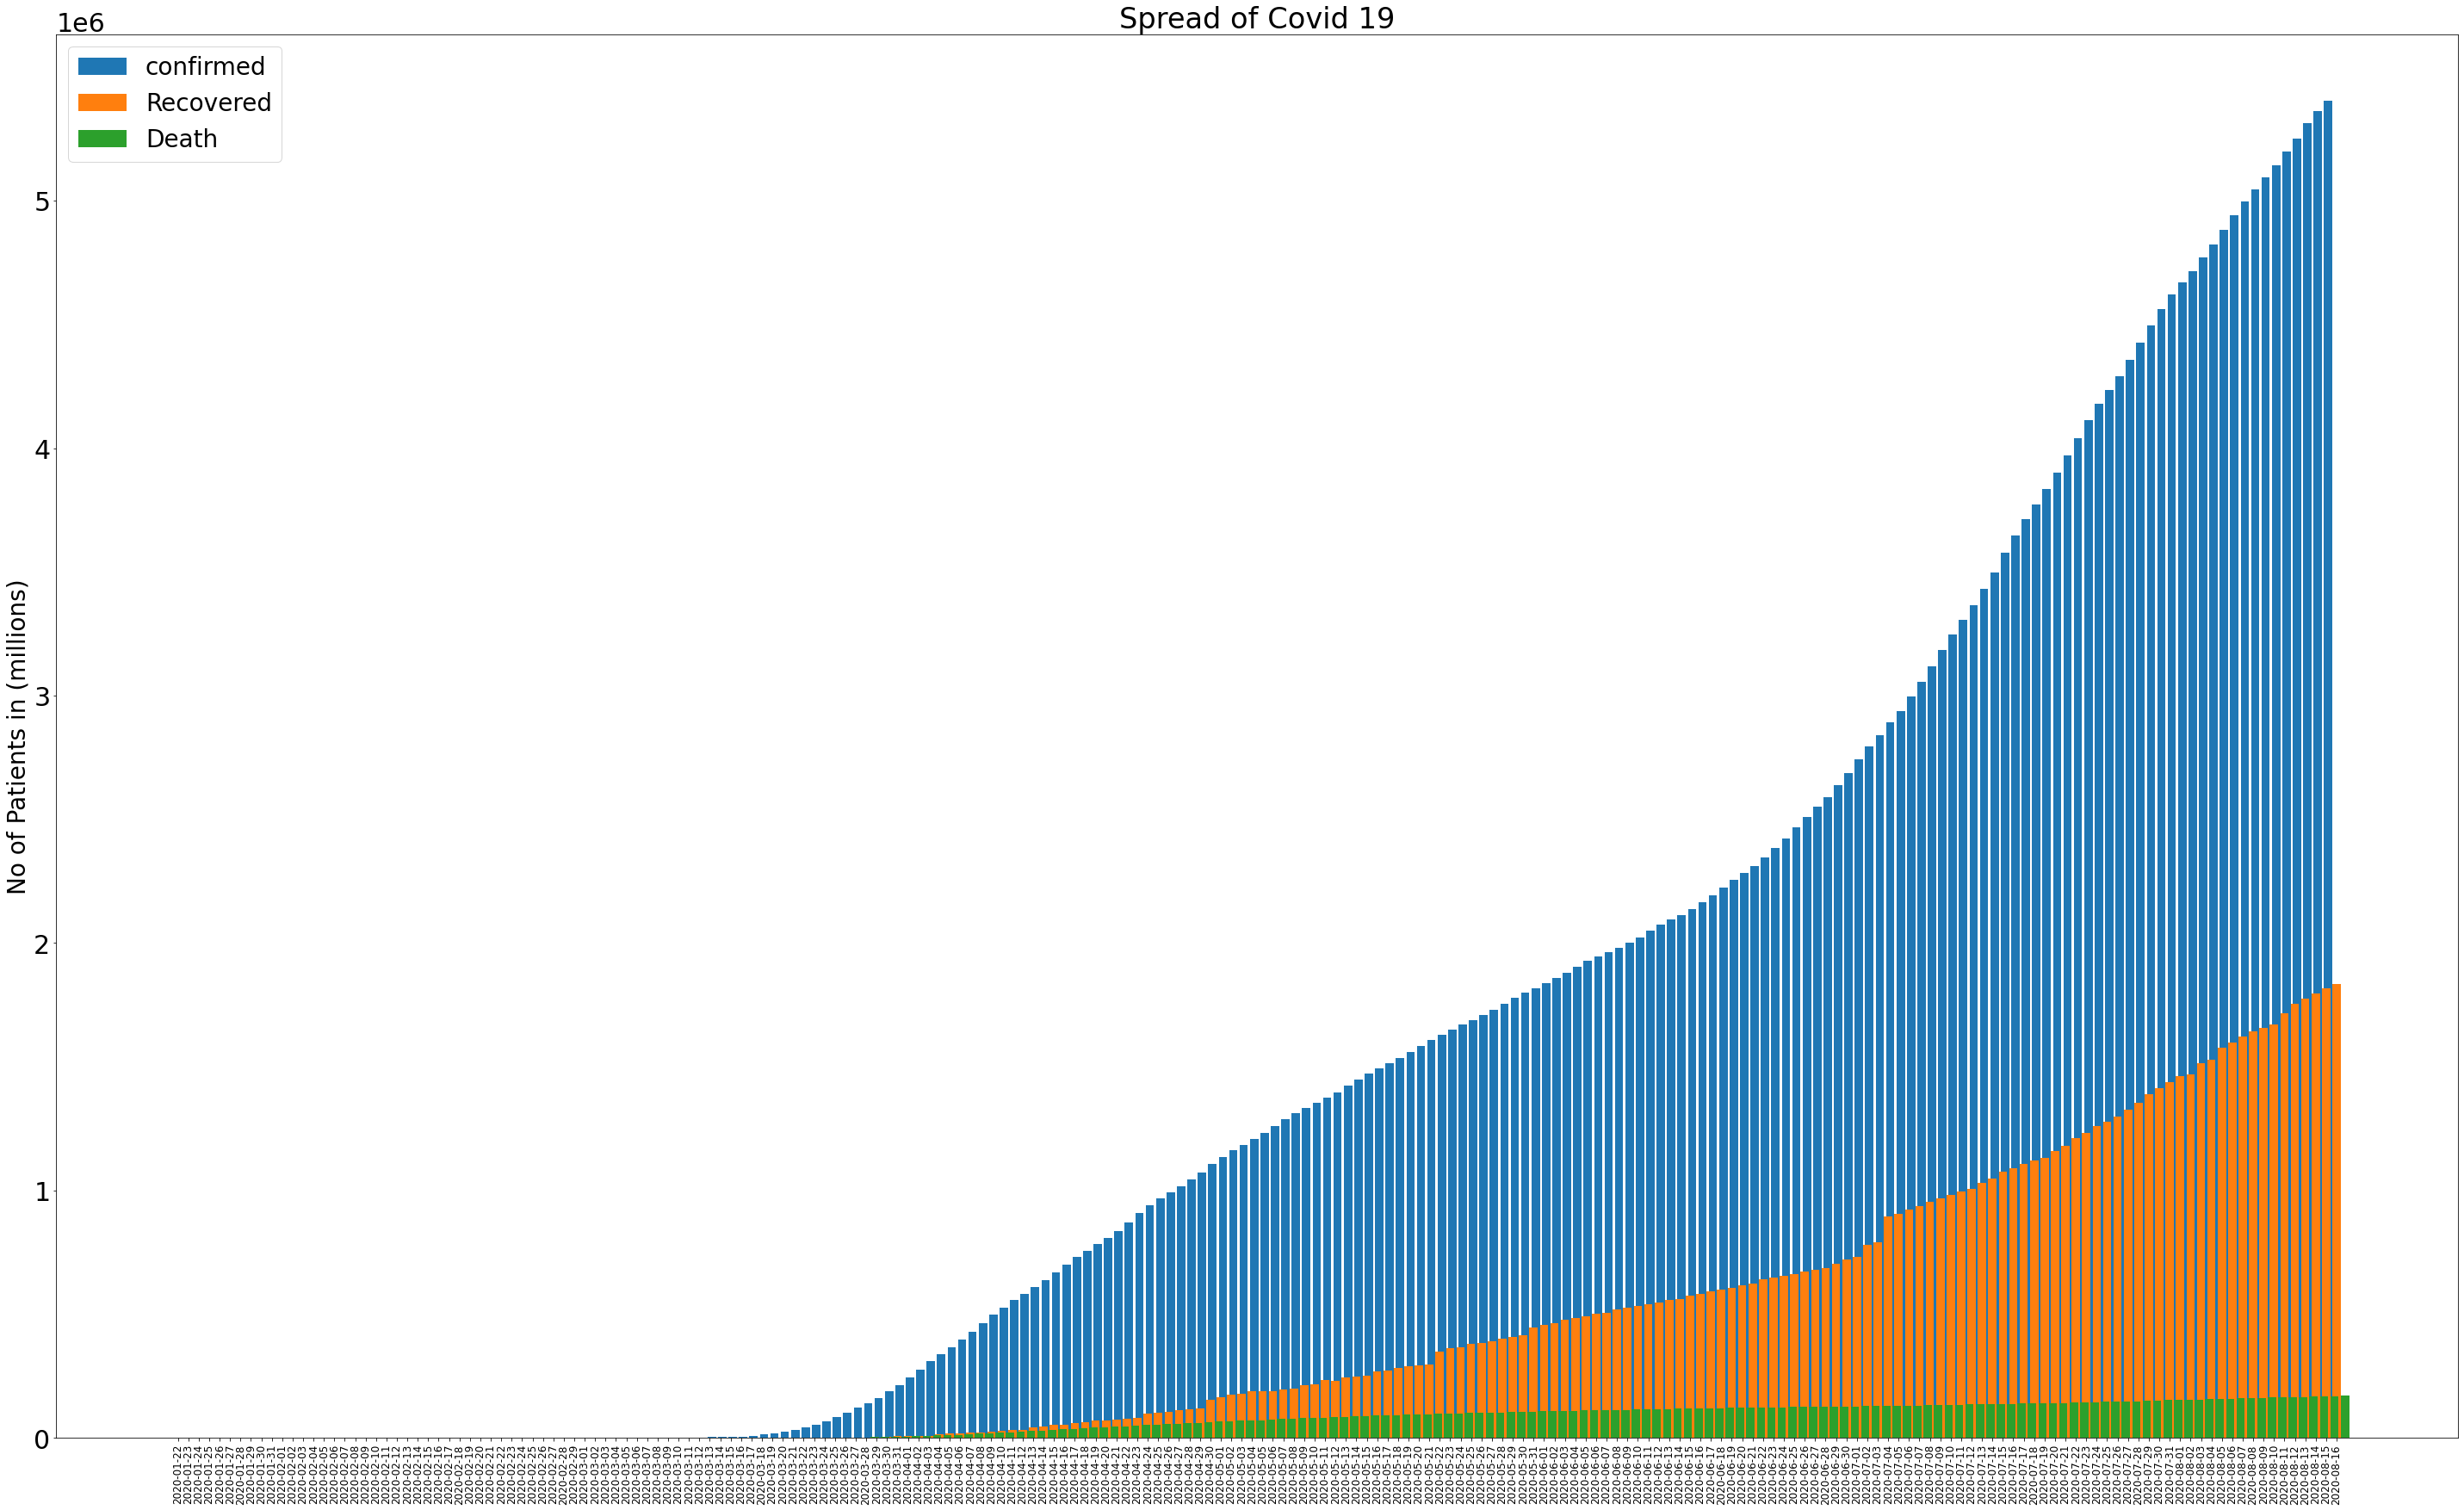

In [6]:
Visualize(Covid_19_Countires_Wise , ['US'],'Spread of Covid 19','No of Patients in (millions)')

## Data Preprocessing

In [7]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]
print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
print(n)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [1869 1013 530]
 [9343 8412 260]
 [5261 2092 132]]
208


## Creating Custom Time Series Model

In [8]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    return new_val
                
No_of_days_to_predict_in_future = 10         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 


val123



% completed = 27.659574468085108
% completed = 55.319148936170215
% completed = 82.97872340425532


,Date,Country,Confirmed,Recovered,Deaths
0,2020-08-17,Madagascar,254,128,2
1,2020-08-18,Madagascar,262,134,2
2,2020-08-19,Madagascar,270,139,2
3,2020-08-20,Madagascar,277,145,2
4,2020-08-21,Madagascar,285,150,2
...,...,...,...,...,...
2063,2020-08-23,Cote d'Ivoire,861,443,7
2064,2020-08-24,Cote d'Ivoire,873,451,7
2065,2020-08-25,Cote d'Ivoire,886,459,7
2066,2020-08-26,Cote d'Ivoire,898,467,7


In [9]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
print(val[:,[2]].astype(np.int))    
print(val[:,[2]].astype(np.int)*w1)
#val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

[[254]
 [262]
 [270]
 ...
 [886]
 [898]
 [909]]
[[2.54000000e+02 2.53877176e+02 2.53754352e+02 ... 3.68471954e-01
  2.45647969e-01 1.22823985e-01]
 [2.62000000e+02 2.61873308e+02 2.61746615e+02 ... 3.80077369e-01
  2.53384913e-01 1.26692456e-01]
 [2.70000000e+02 2.69869439e+02 2.69738878e+02 ... 3.91682785e-01
  2.61121857e-01 1.30560928e-01]
 ...
 [8.86000000e+02 8.85571567e+02 8.85143133e+02 ... 1.28529981e+00
  8.56866538e-01 4.28433269e-01]
 [8.98000000e+02 8.97565764e+02 8.97131528e+02 ... 1.30270793e+00
  8.68471954e-01 4.34235977e-01]
 [9.09000000e+02 9.08560445e+02 9.08120890e+02 ... 1.31866538e+00
  8.79110251e-01 4.39555126e-01]]


In [10]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
val123

,Date,Country,Confirmed,Recovered,Deaths
1188,2020-08-17,US,340516,76738,17698
1189,2020-08-18,US,344654,78031,17858
1190,2020-08-19,US,348706,79297,18015
1191,2020-08-20,US,352673,80538,18169
1192,2020-08-21,US,356558,81754,18319
1193,2020-08-22,US,360363,82945,18466
1194,2020-08-23,US,364089,84112,18610
1195,2020-08-24,US,367738,85255,18751
1196,2020-08-25,US,371312,86376,18889
1197,2020-08-26,US,374813,87474,19024


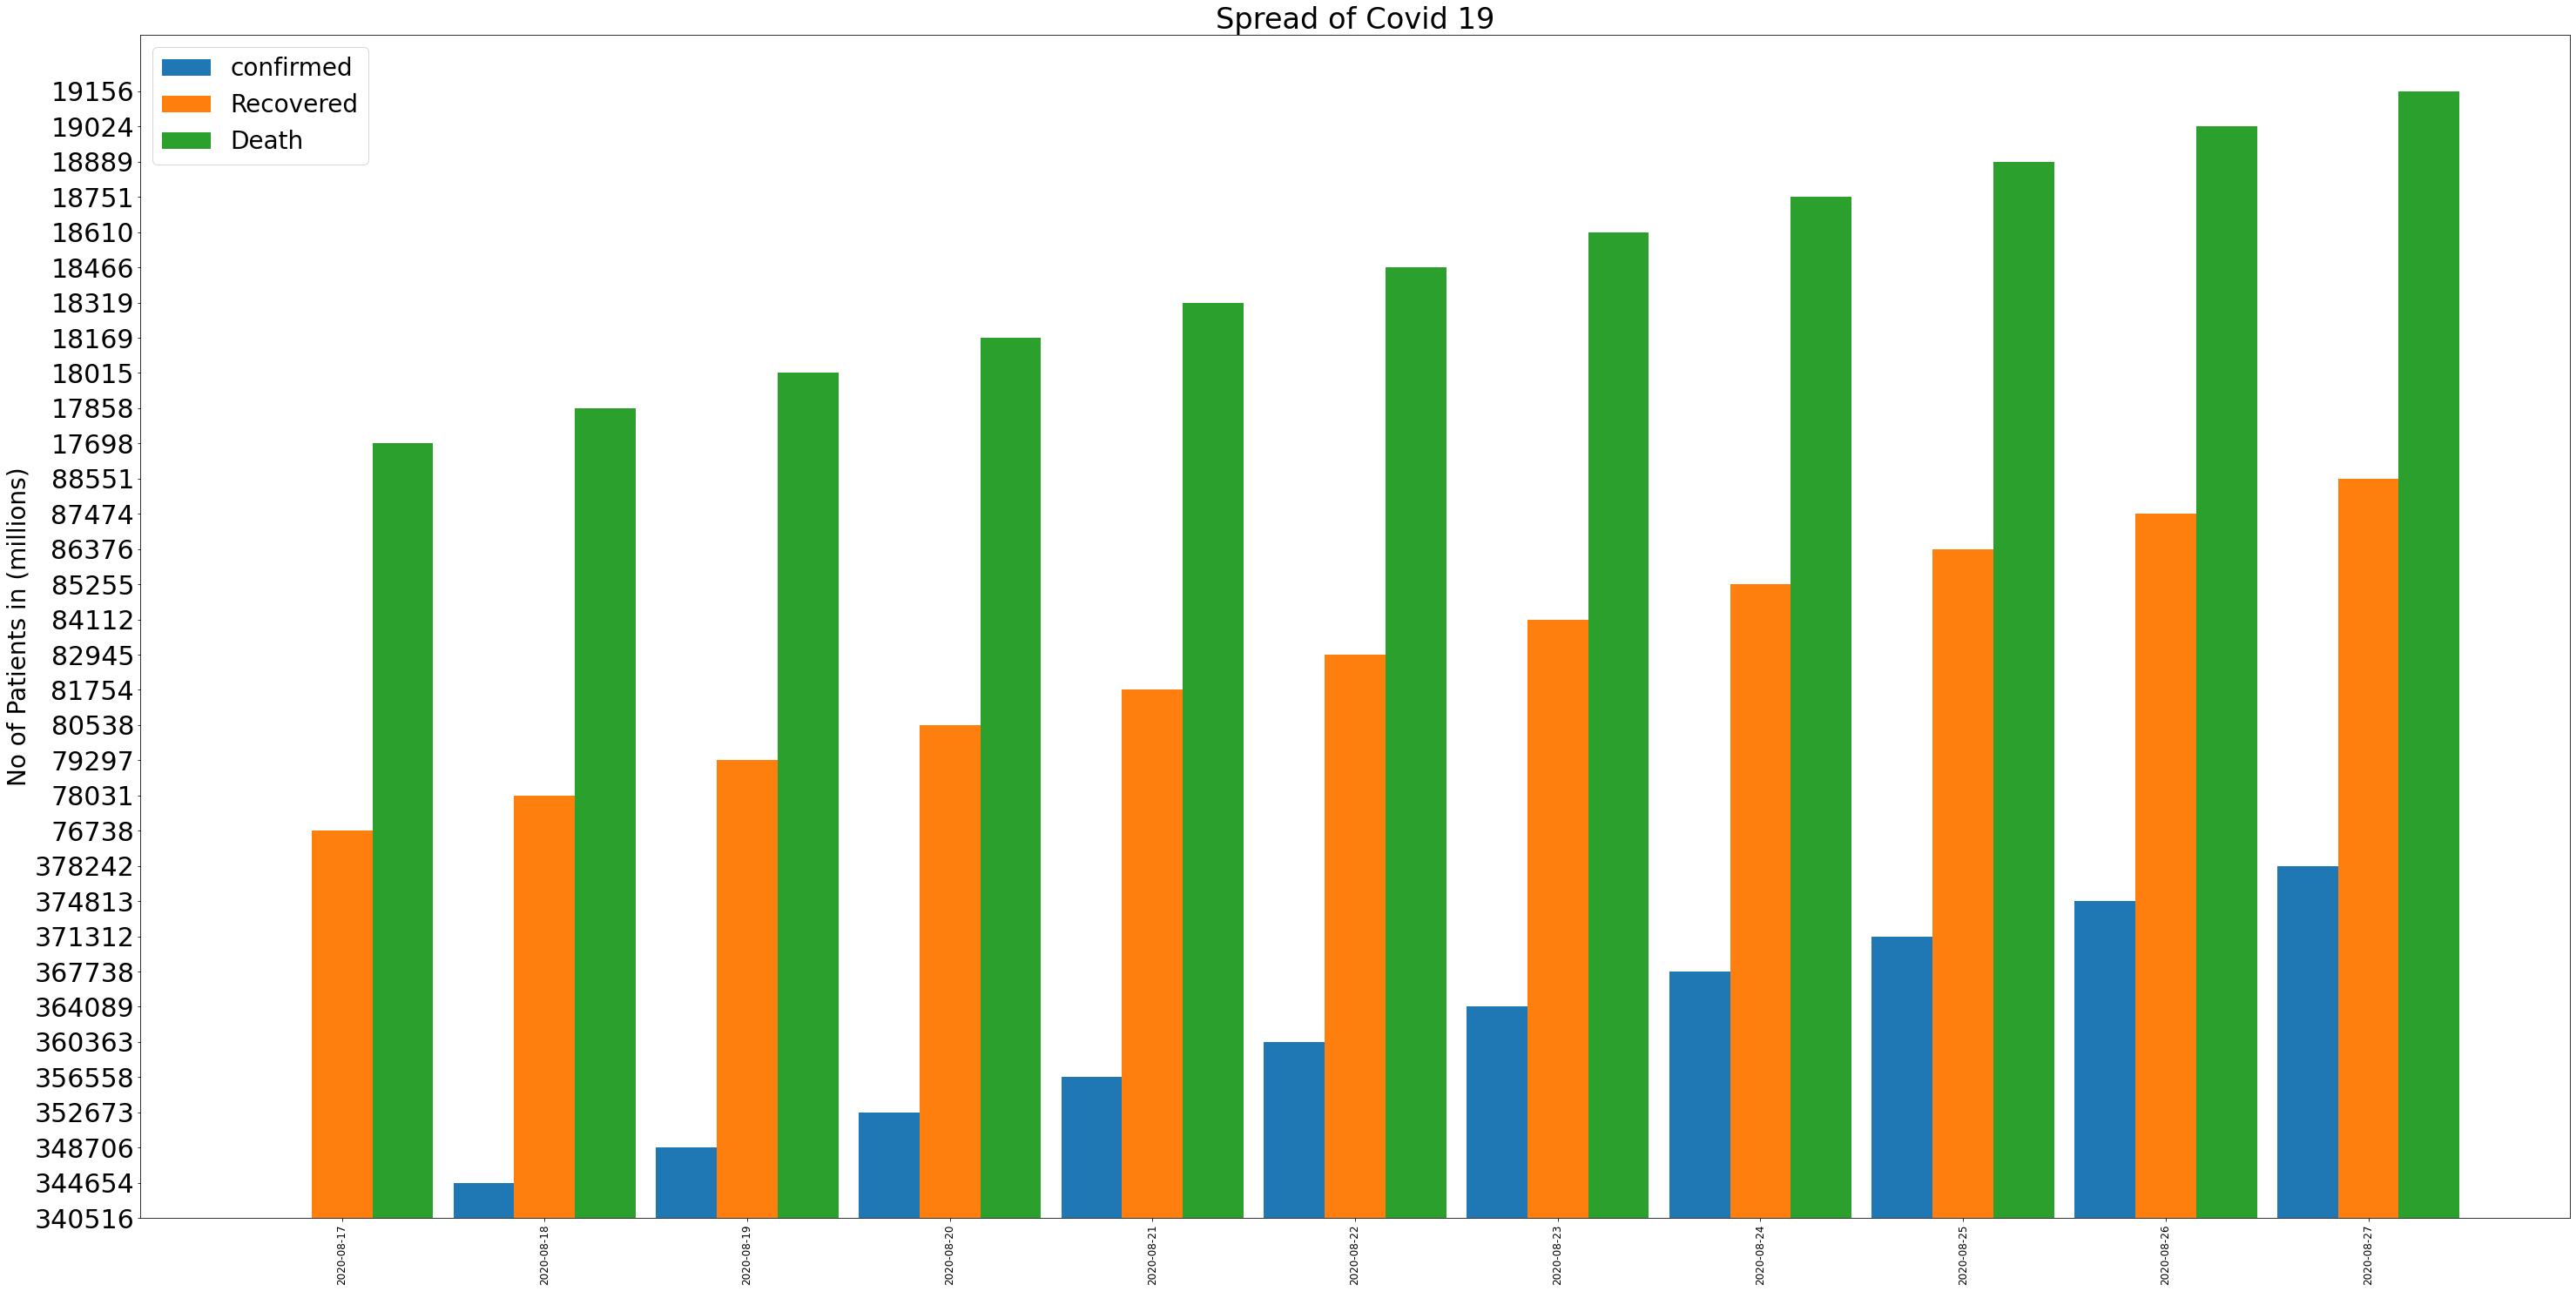

In [11]:
#print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)